# Contenido

- [PCA](#PCA)
    - [Media de un Data set o valor esperado](#Media-de-un-Data-set-o-valor-esperado)
    - [Varianza de un Data set](#Varianza-de-un-Data-set)
    - [Producto punto y proyección en un subespacio](#Producto-punto-y-proyección-en-un-subespacio)
    - [Proyección ortogonal en múltiples dimensiones](#Proyección-ortogonal-en-múltiples-dimensiones)
    - [La idea detrás de PCA](#La-idea-detrás-de-PCA)
    
    
- [Ejemplo: Iris Data Set](#Ejemplo:-Iris-Data-Set)


- [Ejercicio](#Ejercicio)

## PCA 


El análisis de componentes principales es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables (`componentes`) no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.


Vamos a construir poco a poco la idea detrás del PCA.

[Regresar al contenido](#Contenido)

### Media de un Data set o valor esperado


Este es un concepto equivalente a la media aritmética, pero extendido a conjuntos de vectores, cuando pensemos en un data set (DataFrame), podemos pensar que es un conjunto de vectores, en el que cada vector es una observación individual, simplemente diremos que si tenemos un data set $D$, formado por n vectores $\vec{x}$ en $\mathbb{R}^d$, la media del data set, o el _valor esperado_ será:


$$E[D] = \frac{1}{n} \sum_{i= 1}^n \vec{x_i}$$


Cabe destacar que el valor esperado de $D$ no necesariamente es un punto dentro de $D$.

[Regresar al contenido](#Contenido)

### Varianza de un Data set


Anterior mente habíamos hablado de la varianza como una medida que nos permite hacernos una idea de que tan dispersos están los datos, notemos que podemos tener dos data set $D_1$ y $D_2$ con la misma media:

$$D_1 = {1, 2, 4, 5}$$

$$D_2 = {-1, 7, 3}$$

Note que $E[D_1] = E[D_2] = 3$, en principio la media no nos ayuda a poder diferenciar estos dos data sets, y para poder hacernos una idea de en que se diferencian vamos a observar la varianza. Para este caso unidimensional tenemos que:

$$var[D] = \frac{1}{n} \sum_{i= 1}^n (x_i - \mu)^2$$



Donde $\mu = E[D]$, con esta definición tenemos que $var[D_1] = \frac{10}{11}$ y $var[D_2] = \frac{32}{3}$. Una varianza mayor nos indica que los elementos del data set están menos concentrados alrededor de la media, están más dispersos. Ahora extenderemos esta definición a dimensiones más altas. El primer problema que encontramos es que no hay algo como _vectores cuadrados_ por lo que la definición anterior queda obsoleta. Para poder dar una definición útil rescataremos el concepto de covarianza:

$$cov[x, y] = \frac{1}{n} \sum_{i= 1}^n (x_i - \mu_x)(y_i - \mu_y) = E[(x - \mu_x)(y - \mu_y)]$$


Donde $\mu_x = E[x]$ y $\mu_y = E[y]$. Como habíamos mencionado antes la varianza de $x$ puede ser entendida como $cov[x, x]$. Una vez rescatado este concepto definiremos la _matriz de covarianza_

Sea $D$ un vector aleatorio formado por $d$ variables aleatorias $C_1, \cdots, C_d$ y que forman a nuestro data set $X_1, \cdots, X_n$, la matriz de covarianza de $D$ como:

$$var[D] = E[(D - \mu)^T(D - \mu)]$$

Que es una matriz simétrica de valores reales (no todos positivos) que tiene el siguiente aspecto:


$$
\begin{bmatrix}
var[C_1] & cov[C_1, C_2] & \cdots & cov[C_1, C_d]\\
cov[C_2, C_1] & var[C_2] & \cdots & cov[C_2, C_d]\\
\vdots & \vdots & \cdots & \vdots\\
cov[C_d, C_1] & cov[C_d, C_2] & \cdots & var[C_d]\\
\end{bmatrix}
$$

Esta matriz de covarianza es la extensión de la varianza para el caso multidimensional, y nos será de utilidad más adelante.

[Regresar al contenido](#Contenido)

### Producto punto y proyección en un subespacio


Recordemos el producto punto entre vectores rápidamente.

$$ X \cdot Y = X^T Y = \sum x_i y_i$$

Una aplicación que vimos anteriormente del producto punto es el de proyectar un vector $\vec{a}$ en un subespacio $\mathcal{L}$


<img src="Proyeccion ortogonal.png" width = 400 height = 400> 



Supongamos que tenemos un vector $\vec{b}$ que genera un subespacio $\mathcal{L}$, y tenemos un vector $\vec{a}$ que no pertenece a $\mathcal{L}$, entonces podemos hallar la proyección $\pi_{\mathcal{L}} (\vec{a})$. Esta proyección debe cumplir las siguientes dos propiedades.



- $\pi_{\mathcal{L}} (\vec{a}) \in \mathcal{L}$, es decir, existe un escalar $\lambda$ tal que $\pi_u (\vec{a}) = \lambda \vec{b}$
- $\vec{b}  \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = 0$


Analicemos un poco que pasa con la segunda condición para poder deducir quien es nuestra proyección. Tenemos:


$$\vec{b}  \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = \vec{b} \cdot \pi_{\mathcal{L}} (\vec{a}) - \vec{b} \cdot \vec{a} = \vec{b} \cdot \lambda \vec{b} - \vec{b} \cdot \vec{a} = 0$$
$$\lambda ||\vec{b}||^2 = \vec{b} \cdot \vec{a}$$
$$\lambda = \frac{\vec{b} \cdot \vec{a}}{||\vec{b}||^2}$$

A $\lambda$ se le conoce como la coordenada de $\pi_{\mathcal{L}} (\vec{a})$ en la base $\{\vec{b}\}$. una vez que ya identificamos $\lambda$ podemos escribir la proyección como:

$$\pi_{\mathcal{L}} (\vec{a}) = \lambda \vec{b} = \frac{\vec{b} \cdot \vec{a}}{||\vec{b}||^2} \vec{b} = \frac{b b^T}{||b||^2}a$$


Donde a $\frac{b b^T}{||b||^2}$ la llamaremos matriz de proyección. Que cumple ser cuadrada y simétrica. Veamos un ejemplo en 2 dimensiones. Suponga que:


$$
b = 
\begin{bmatrix}
b_1\\
b_2\\
\end{bmatrix}
$$

Entonces:

$$
bb^T = 
\begin{bmatrix}
b_1\\
b_2\\
\end{bmatrix}
\begin{bmatrix}
b_1 & b_2\\
\end{bmatrix}
=
\begin{bmatrix}
b_1^2  & b_1 b_2\\
b_1 b_2  & b_2^2\\
\end{bmatrix}
$$



[Regresar al contenido](#Contenido)

### Proyección ortogonal en múltiples dimensiones


Imaginemos que ahora el subespacio $\mathcal{L}$ tiene una base de más de un elemento, pongamos como ejemplo el caso en el que $\mathcal{L}$ es un plano en el espacio



<img src="Proyección ortogonal 2D.png" width = 400 height = 400> 


en este caso la base de $\mathcal{L}$ estará formada por dos vectores $\{\vec{b_1}, \vec{b_2}\}$, la proyección $\pi_{\mathcal{L}} (\vec{a})$ sera un vector en $\mathcal{L}$, es decir que se puede escribir como una combinación lineal de $\vec{b_1}$ y $\vec{b_2}$. En general si la base de $\mathcal{L}$ está formada por $n$ vectores $\vec{b_i}$ tenemos que $\pi_{\mathcal{L}} (\vec{a})$ cumplirá que:


- $\pi_{\mathcal{L}} (\vec{a}) = \sum_{i = 1}^{n} \lambda_i \vec{b_i}$
- $b_i \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = 0$, para todo $i = 1, \cdots, n$


No te que si llamamos simplemente $\lambda$ al vector que contiene a todos los $\lambda_i$ y $B$ a la matriz que tiene por columnas los vectores de la base $\vec{b_i}$, podemos escribir la primera propiedad como:

$$\pi_{\mathcal{L}} (\vec{a}) = B \lambda$$

De esta forma tenemos (recordando que $(AB)^T = B^TA^T$):

$$\vec{b_i} \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = \vec{b_i} \cdot (B \lambda - \vec{a}) =  \vec{b_i} \cdot B \lambda - \vec{b_i} \cdot \vec{a} = 0$$
$$\vec{b_i} \cdot B \lambda = \vec{b_i} \cdot \vec{a}$$
$$b_i^T B \lambda = b_i^T \vec{a}$$
$$\lambda^T B^T b_i = a^T b_i$$
$$\lambda^T B^T B = a^T B$$
$$\lambda^T = a^T B (B^TB)^{-1}$$
$$\lambda = (B^TB)^{-1}B^T a $$

Hay que notar que $(B^TB)^{-1}$ es simétrica, y por tanto igual a su transpuesta. veámoslo con un ejemplo de dos vectores $b$ y $v$:

$$
\begin{bmatrix}
b_1  & b_2\\
v_1  & v_2\\
\end{bmatrix}
\begin{bmatrix}
b_1  & v_1\\
b_2  & v_2\\
\end{bmatrix}
=
\begin{bmatrix}
b \cdot b  & b \cdot v\\
v \cdot b  & v \cdot v\\
\end{bmatrix}
$$



Ahora $\lambda$ es el vector de coordenadas de $\pi_{\mathcal{L}} (\vec{a})$ en la base $\{ b_1, b_2\}$, y podemos escribir:

$$\pi_{\mathcal{L}} (\vec{a}) = B \lambda = B (B^TB)^{-1}B^T a$$

Donde $B (B^TB)^{-1}B^T$ es la matriz de proyección, nos interesa destacar un caso particular, y es en el que $b_1$, $b_2$ forman una base ortonormal, en ese caso $(B^TB)^{-1} = I$ y podemos simplificar la proyección:

$$\pi_u (X) = B \lambda = BB^T X$$


[Regresar al contenido](#Contenido)

### La idea detrás de PCA


La idea subyacente al aplicar PCA es la de buscar una aproximación de nuestros datos, en forma de proyección ortogonal de nuestros datos en un subespacio vectorial, la idea es hacerlo de forma óptima para perder la menor información posible, pero al mismo tiempo obteniendo una aproximación de nuestros con una dimensionalidad menor, es decir que necesitamos menos vectores para describirla.


<img src="Posibles proyecciones.gif" width = 600 height = 600> 
<img src="Proyección optima.gif" width = 600 height = 600> 


Ahora supongamos que tenemos un data set $X = \{X_1, \cdots, X_n\}$ con $X_i \in \mathbb{R}^d$. Cabe destacar que el modelo supone que $E[X] = 0$. Y suponga que se tiene una base $B = \{b_1, \cdots, b_d\}$, siendo una base ortonormal. Entonces cada $X_i$ puede ser escrito como:


$$X_i = \sum_{j = 1}^d \beta_{ji} b_j$$

Ahora vamos a generar dos subespacios de $\mathbb{R}^d$ dividiendo la base $B$ en dos conjuntos separados: $B_p = \{b_1, \cdots, b_m\}$ y $B_c = \{b_{m + 1}, \cdots, b_d\}$, en si mismas cada una nos representa un subespacio, al que llamaremos subespacio principal, y complementario respectivamente. Note también que $B_p$ y $B_c$ son ortonormales, y podemos reescribir la expresión anterior:




$$X_i = \sum_{j = 1}^m \beta_{ji} b_j + \sum_{j = m + 1}^d \beta_{ji} b_j$$


Lo que buscamos entonces es una proyección ortogonal de cada $X_i$ en $B_p$, es decir buscamos $\tilde{X}_i$ tal que:

$$\tilde{X}_i = B_p B_p^T X_i$$


Donde a $B_p^T X_i$ llamaremos las coordenadas de $\tilde{X}_i$ en el subespacio principal. Buscamos optimizar la función error $J$, que viene expresada de la siguiente forma:


$$J = \frac{1}{n} \sum_{i = 1}^{n} ||X_i - \tilde{X}_i||^2$$

Ahora noten que podemos escribir $X_i$ como: 


$$X_i = B_p B_p^T X_i + B_c B_c^T X_i$$


Entonces:

$$J = \frac{1}{n} \sum_{i = 1}^{n} ||X_i - \tilde{X}_i||^2 = \frac{1}{n} \sum_{i = 1}^{n} ||B_c B_c^T X_i||^2$$

$$B_c B_c^T \frac{1}{n} \sum_{i = 1}^{n} ||X_i||^2 = B_c B_c^T \frac{1}{n} \sum_{i = 1}^{n} X_i X_i^T$$

$$J = B_c B_c^T var[X]$$


Este resultado es muy potente y para poder entender porque, vamos a simplificar el caso, suponga que $B$ solo está formada por los vectores $b_1$, y $b_2$, $b_1$ generará el espacio principal, y $b_2$ el complementario. por lo que podemos simplificar $J$ como sigue:


$$J = b_2^T var[X] b_2$$

Y además se cumple que $b_2^T b_2 = 1$ ya que la base es ortonormal. Ahora podemos aplicar el método de los multiplicadores de Lagrange para optimizar $J$, no desarrollaremos todo el método solo nos fijaremos en lo siguiente:


$$\frac{\partial L}{\partial b_2} = b_2^T var[X] - \lambda b_2^T$$

$$b_2^T var[X] = \lambda b_2^T$$
$$var[X] b_2 = \lambda b_2$$


Es decir los vectores de la base son los vectores propios de $var[X]$ !!!!. 

<img src="impactado.gif" width = 600 height = 600> 


Además podemos escribir $J = \lambda$ por lo que optimizar $J$ se puede entender como tomar los vectores propios correspondientes a los valores propios de $var[X]$ más pequeños como base del subespacio complementario.


[Regresar al contenido](#Contenido)

# Ejemplo: Iris Data Set

A continuación mostraremos un ejemplo de PCA aplicado a un data set de 4 dimensiones, los pasos a elegir son los siguientes:


- Cargar los datos
- Normalizarlos
- Obtener los autovectores y autovalores a partir de la matriz de covarianza
- Seleccionar los autovectores correspondientes a las componentes principales
- Proyectar el dataset original sobre el nuevo espacio de dimensión < 4



Este dataset se usa como datos de entrenamiento para un modelo de machine learning cuyo objetivo es determinar de forma automática la especie a la que pertenece una determinada flor, a partir de las medidas 4 atributos o características. En particular, la longitud y la anchura de sus pétalos y sépalos expresadas en centímetros. Por tanto, se trata de un problema de 4 dimensiones, en el que la variable objetivo (target) es la especie. Los datos se pueden representar en forma de una matriz de 150 filas (los datos de cada flor), por 4 columnas (las medidas de sus pétalos/sépalos). La quinta, corresponde a la variable objetivo, la especie.


<img src="Iris data set.PNG" width = 600 height = 600> 

Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Sin embargo, como ya comentamos en el post anterior (en forma de una de las limitaciones del PCA), al aplicar esta técnica se asume que los datos de trabajado tienen una distribución gaussiana o normal.  Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. Para ello, usaremos la transformación Standardscaler de sklearn.

Si lo que queremos es reducir la dimensionalidad del dataset, perdiendo la menor información posible, descartaremos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global. Para ello, lo que se hace es ordenarlos por parejas de autovector, autovalor.

El objetivo de este caso es proyectar este dataset 4D en un espacio de menor dimensionalidad, para mejorar la eficiencia de cálculo, al mismo tiempo que se retiene la mayor parte de la información. La pregunta clave será ¿cuál va ser este valor? ¿3D?¿2D?¿1D?. Para ello seguiremos el siguiente proceso.

Una vez ordenados los autovalores, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de autovectores o componentes principales, con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. Para ello, usaremos una métrica que se conoce como “varianza explicada”, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

En la gráfica se aprecia claramente que la mayor parte de la varianza (en torno al 70%) corresponde a la primera componente. La segunda acumula algo más del 20% de la varianza, mientras que la tercera puede ser descartada sin perder demasiada información, ya que las dos primeras componentes explican más del 90% de la varianza.

In [4]:

import pandas as pd
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import seaboard as sns

ModuleNotFoundError: No module named 'seaboard'

ModuleNotFoundError: No module named 'seaboard'

Y ¡ya está!. Hemos conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos dimensiones que aun así conserva la información más esencial. de forma que nos resultará mucho más sencillo el trabajo de crear un modelo de clasificación a partir de estos datos. Como ya indicamos anteriormente, es una técnica muy frecuente, ya que es sencilla y facilita mucho el trabajo posterior.

[Regresar al contenido](#Contenido)

<hr>
<h2>Ejercicio</h2>

En los modelos de ML es muy importante usar como variables predictoras aquellas que tengan una baja correlación entre ellas, y ahí es donde entra PCA en nuestro análisis.

La siguiente línea importa un data set que contiene información sobre el estatus socioeconómico de diferentes países.

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#read data
data = pd.read_csv('Country-data.csv')
data.set_index('country', inplace = True)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


NameError: name 'sns' is not defined

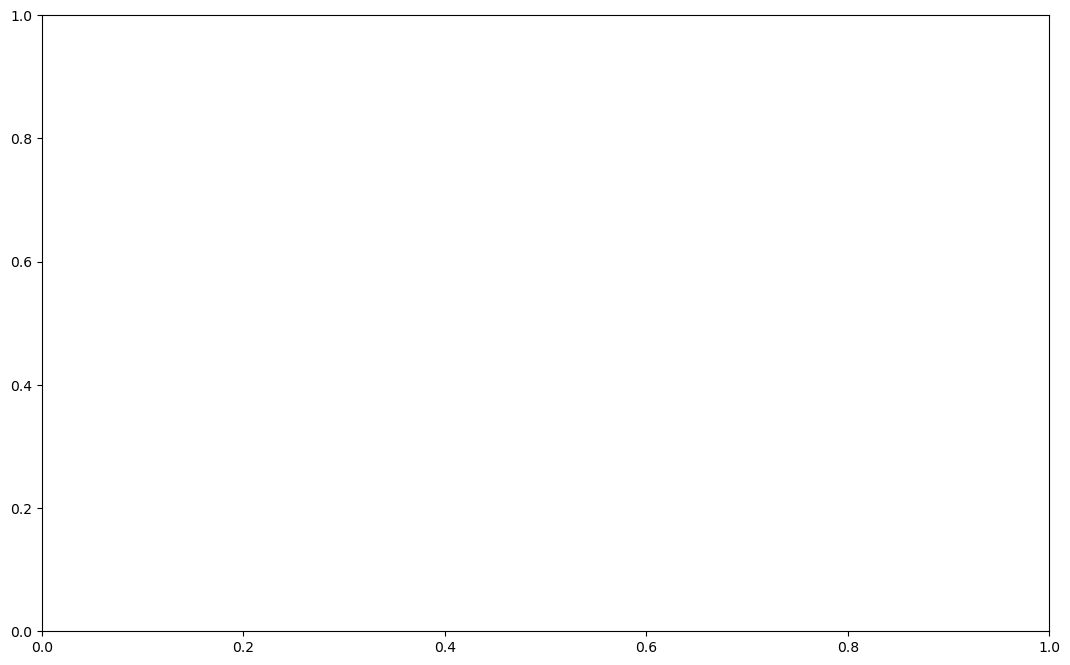

In [3]:
fig, ax = plt.subplots(figsize = (13, 8))

sns.heatmap(data.corr(), ax = ax, annot = True);

Como se puede observar en la matriz de correlación tenemos varias variables (columnas) con una alta correlación.

- Haga una inspección y limpieza general del DataFrame (NaN's y outliers)
- Aplique PCA para encontrar las componentes principales del DataFrame
    - Utilice el criterio de la varianza explicada para conocer el número de componentes
    
- Dé el nombre de las columnas principales.
- Grafique la matriz de covarianza de las componentes principales para corroborar que las componentes que obtuvimos tienen poca correlación entre ellas.

[Regresar al contenido](#Contenido)